In [8]:
# This is the content for Jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [9]:
# Add project root to path
sys.path.append('..')

from src.data_processing import DataProcessor
from config import *

# Initialize data processor
processor = DataProcessor()
df = processor.generate_sample_data(5000)

# Basic exploration
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   income              5000 non-null   float64
 2   employment_length   5000 non-null   float64
 3   debt_to_income      5000 non-null   float64
 4   credit_utilization  5000 non-null   float64
 5   payment_history     5000 non-null   int64  
 6   number_of_accounts  5000 non-null   int64  
 7   loan_amount         5000 non-null   float64
 8   loan_term           5000 non-null   int64  
 9   home_ownership      5000 non-null   object 
 10  purpose             5000 non-null   object 
 11  credit_score        5000 non-null   int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 468.9+ KB
None

Dataset Description:
               age         income  employment_length  debt_to_income  \
count  5000.000000    5000.000

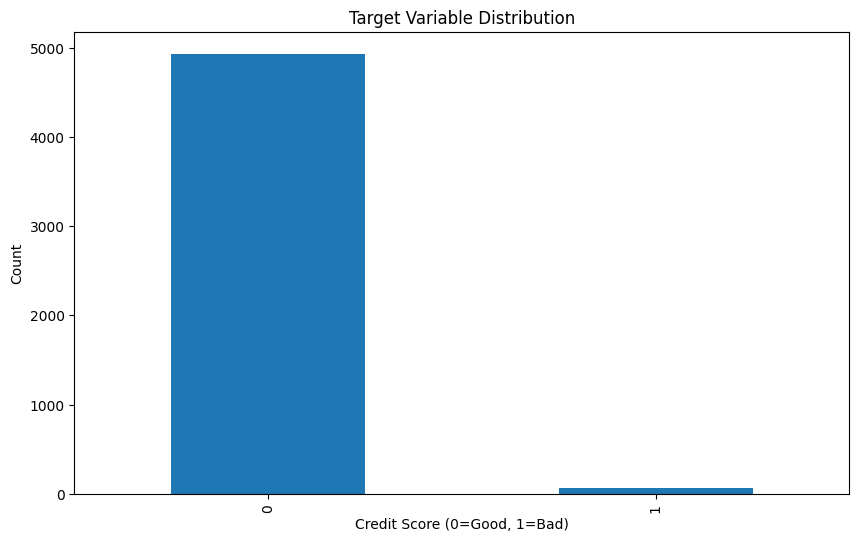

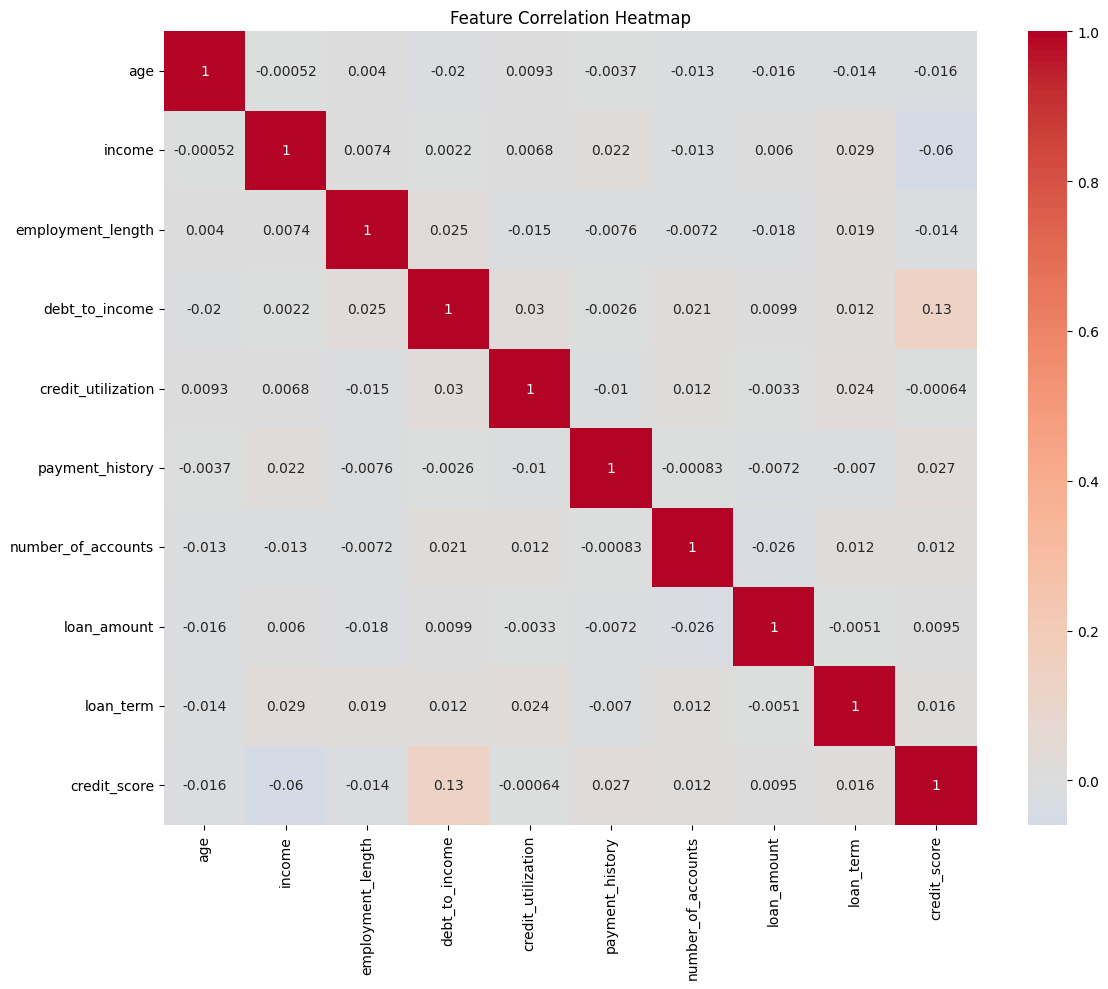

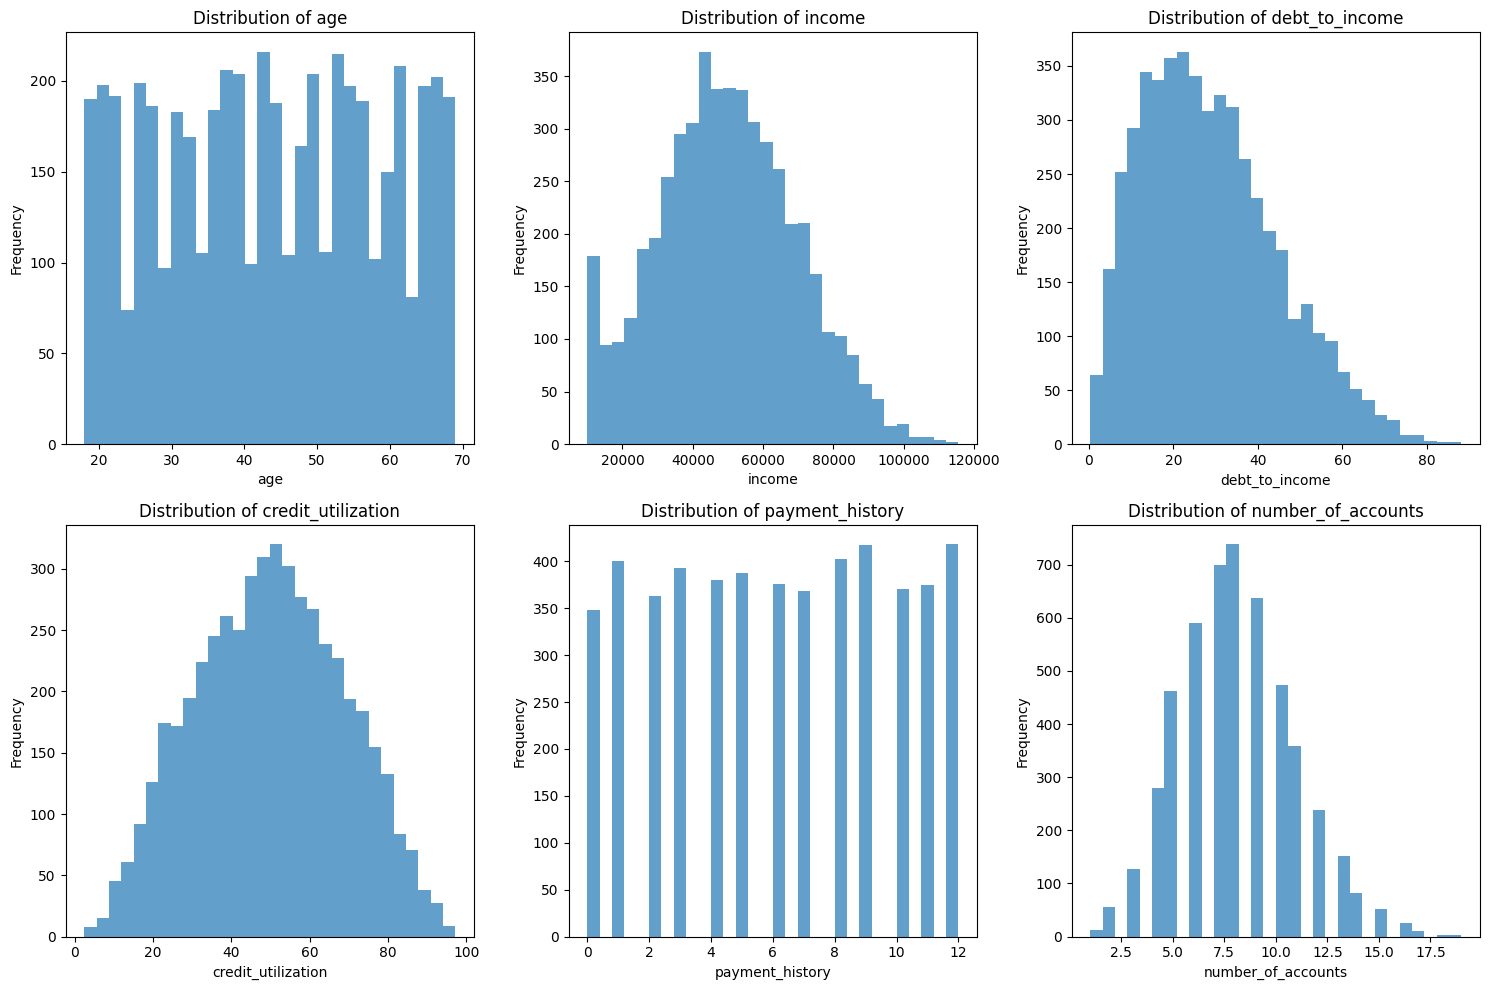

In [10]:
# Target distribution
plt.figure(figsize=(10, 6))
df['credit_score'].value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel('Credit Score (0=Good, 1=Bad)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Feature distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

features_to_plot = ['age', 'income', 'debt_to_income', 'credit_utilization', 'payment_history', 'number_of_accounts']

for i, feature in enumerate(features_to_plot):
    axes[i].hist(df[feature], bins=30, alpha=0.7)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()